In [1]:
import numpy as np 
import pandas as pd 
import os
# import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers



In [2]:
batch_size = 40
img_height = 200
img_width = 200


In [3]:
## loading training data
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    './data',
    validation_split=0.2,
    subset= "training",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size
)

Found 7553 files belonging to 2 classes.
Using 6043 files for training.


In [4]:
## loading testing data
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    './data',
    validation_split=0.2,
    subset= "validation",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 7553 files belonging to 2 classes.
Using 1510 files for validation.


In [5]:
class_names = training_ds.class_names

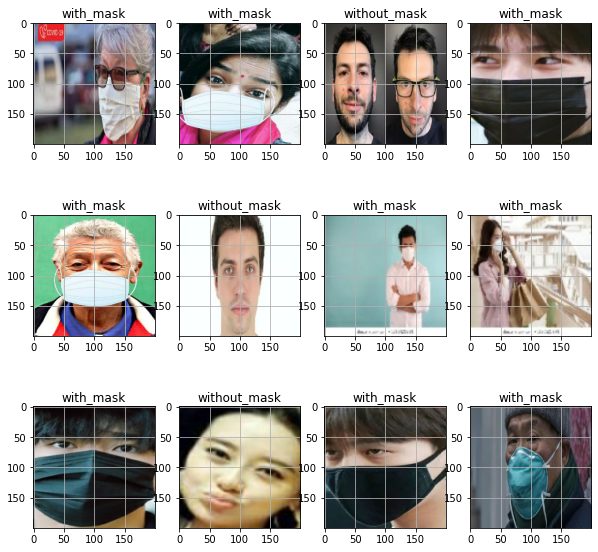

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.grid(True)

In [7]:
## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
## lets define our CNN
MyCnn = tf.keras.models.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  # Some thing I realised just
  # using flatten layer will 
  # increase the size of your
  # model, hence use
  # Global avg Pooling 
  # instead
  # layers.Flatten(),
  layers.GlobalAveragePooling2D(),
  layers.Dense(256, activation='relu'),
  layers.Dense(2, activation= 'softmax')
])

In [9]:
MyCnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
## lets train our CNN
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
retVal = MyCnn.fit(training_ds, validation_data= testing_ds, epochs = 15)

Num GPUs Available:  1
Epoch 1/15
152/152 [==============================] - 55s 207ms/step - loss: 0.5999 - accuracy: 0.6758 - val_loss: 0.5202 - val_accuracy: 0.7497
Epoch 2/15
152/152 [==============================] - 18s 120ms/step - loss: 0.5404 - accuracy: 0.7298 - val_loss: 0.5092 - val_accuracy: 0.7430
Epoch 3/15
152/152 [==============================] - 15s 100ms/step - loss: 0.5243 - accuracy: 0.7422 - val_loss: 0.4892 - val_accuracy: 0.7589
Epoch 4/15
152/152 [==============================] - 12s 76ms/step - loss: 0.5055 - accuracy: 0.7529 - val_loss: 0.4541 - val_accuracy: 0.7894
Epoch 5/15
152/152 [==============================] - 11s 76ms/step - loss: 0.4719 - accuracy: 0.7802 - val_loss: 0.4190 - val_accuracy: 0.7927
Epoch 6/15
152/152 [==============================] - 13s 84ms/step - loss: 0.4060 - accuracy: 0.8216 - val_loss: 0.3214 - val_accuracy: 0.8702
Epoch 7/15
152/152 [==============================] - 12s 76ms/step - loss: 0.3604 - accuracy: 0.8524 - val_lo

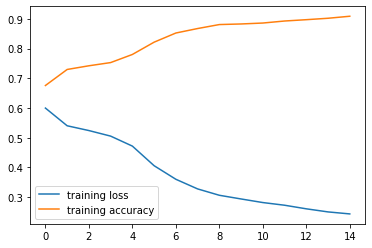

In [11]:
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.legend()

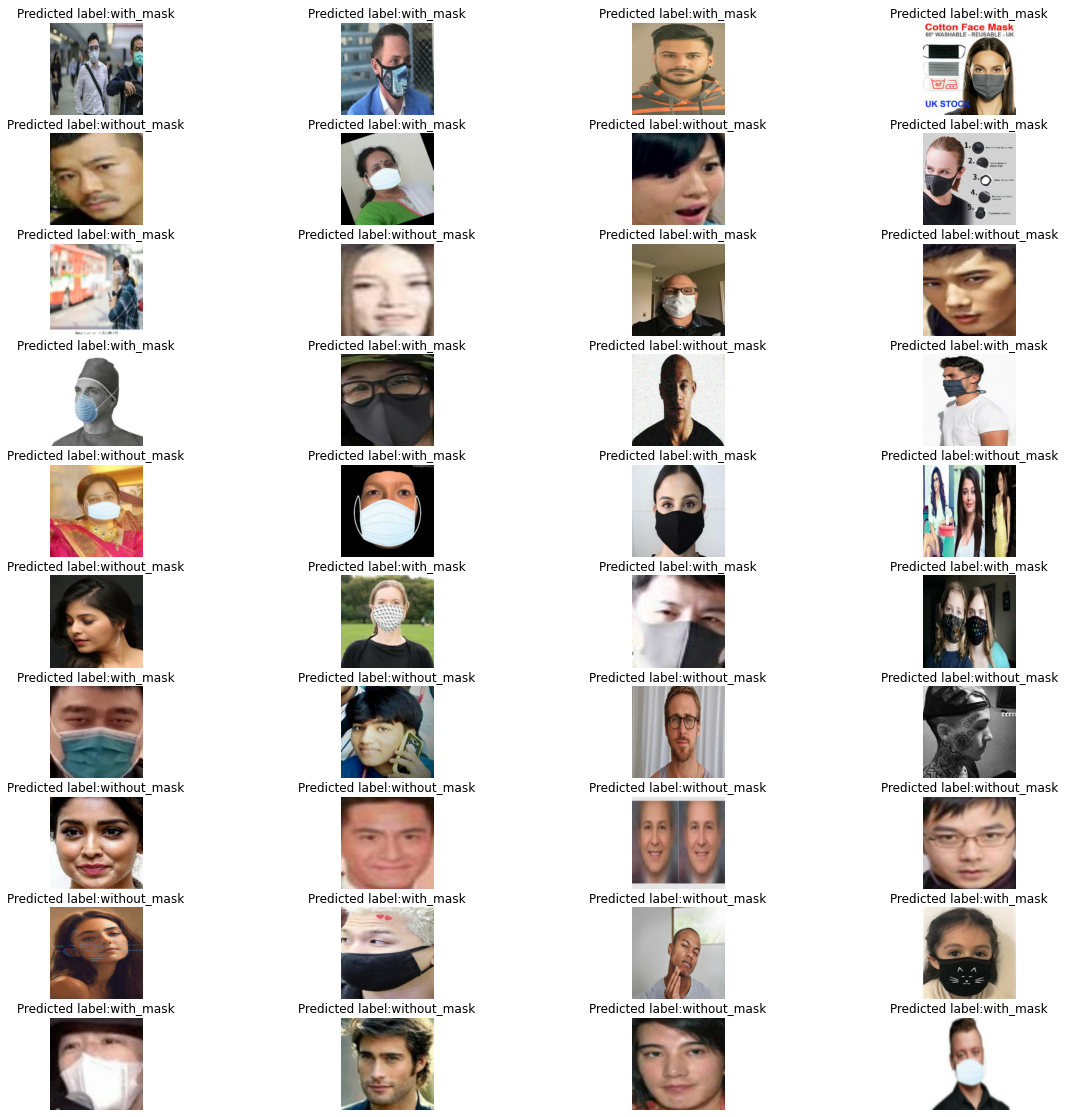

In [12]:
plt.figure(figsize=(20, 20))
for images, labels in testing_ds.take(1):
    predictions = MyCnn.predict(images)
    predlabel = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
    
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Predicted label:'+ predlabel[i])
        plt.axis('off')
        plt.grid(True)
    